In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [24]:
df = pd.read_csv('ToyotaCorolla.csv', encoding='latin1')

In [25]:
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [27]:
data = df[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [29]:
data.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [31]:
data.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [32]:
data.describe(include='all')

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [38]:
data.duplicated().sum()

1

In [37]:
data[data.duplicated]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [39]:
data.drop_duplicates(inplace=True)

C:\Users\Rathnavel\AppData\Local\Temp\ipykernel_2196\2282015914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [40]:
data[data.duplicated]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight


In [41]:
data.duplicated().sum()

0

In [43]:
data.shape

(1435, 9)

In [44]:
ft = data.drop('Price', axis = 1)

In [50]:
ft.shape

(1435, 8)

In [51]:
tt = data['Price']

In [52]:
tt.reshap

(1435,)

In [53]:
std_scale = StandardScaler()

In [54]:
ft = std_scale.fit_transform(ft)

In [59]:
ft.shape

(1435, 8)

In [64]:
x_train,x_test,y_train,y_test= train_test_split(ft,tt,train_size=0.75,random_state=70)

In [65]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1076, 8)
(1076,)
(359, 8)
(359,)


In [66]:
linmodel = LinearRegression()

In [67]:
linmodel.fit(x_train,y_train)

LinearRegression()

In [68]:
ypred = linmodel.predict(x_test)
ypred

array([10885.91885979,  9204.05607326,  8883.92035585, 13547.54811021,
        7437.53090995,  9777.74224487,  6144.56088146, 10657.28874978,
       10379.63923385, 10317.58280052, 18929.85365032, 12157.53916986,
       12906.69656865, 11007.38945279, 13736.91777823, 10928.48033496,
       12170.80261662,  7524.65880836, 13729.62437973,  9937.11314382,
       18338.25165919,  9550.26976264, 12017.81914586, 10824.49875992,
       15976.08636002,  7897.52769506,  9253.18220936, 10287.68673593,
       12777.67862164,  9423.59344106,  8672.38875865,  7875.0258679 ,
        9733.915476  , 12888.34091176,  9534.33388728, 16156.8201235 ,
       18242.27770109,  8665.20180905,  7811.33493553,  9248.45275899,
       19214.87425372,  8307.19946384,  7699.96221248, 10761.04929546,
        6897.24387502,  7682.23284424,  8005.42368854,  8896.318946  ,
       18816.60118108,  6245.20287918,  9025.55653573, 18168.56162429,
       10507.35356067,  6481.96011584, 11187.80033929,  8610.29339663,
      

In [70]:
modelscore = linmodel.score(x_test,y_test)
modelscore

0.8301485971821285

In [85]:
r2score = r2_score(y_test,ypred)
r2score

0.8301485971821285

<Axes: xlabel='Price'>

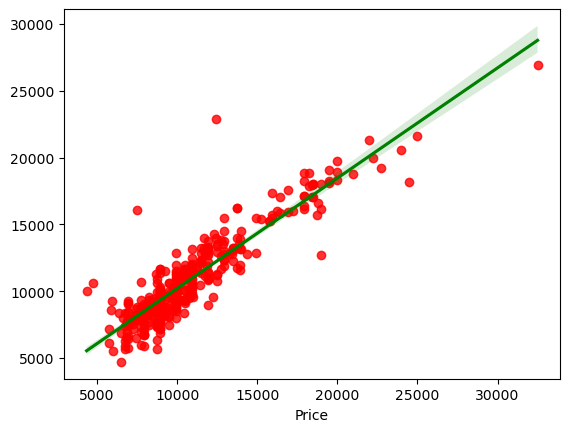

In [86]:
sns.regplot(data=data,x=y_test,y=ypred,scatter_kws={'color':'red'},line_kws={'color':'green'})

In [92]:
print(f"The r^2 value is {r2score}")
print(f"The model score is {modelscore}")
print(f"The ypredict values are {ypred}")

The r^2 value is 0.8301485971821285
The model score is 0.8301485971821285
The ypredict values are [10885.91885979  9204.05607326  8883.92035585 13547.54811021
  7437.53090995  9777.74224487  6144.56088146 10657.28874978
 10379.63923385 10317.58280052 18929.85365032 12157.53916986
 12906.69656865 11007.38945279 13736.91777823 10928.48033496
 12170.80261662  7524.65880836 13729.62437973  9937.11314382
 18338.25165919  9550.26976264 12017.81914586 10824.49875992
 15976.08636002  7897.52769506  9253.18220936 10287.68673593
 12777.67862164  9423.59344106  8672.38875865  7875.0258679
  9733.915476   12888.34091176  9534.33388728 16156.8201235
 18242.27770109  8665.20180905  7811.33493553  9248.45275899
 19214.87425372  8307.19946384  7699.96221248 10761.04929546
  6897.24387502  7682.23284424  8005.42368854  8896.318946
 18816.60118108  6245.20287918  9025.55653573 18168.56162429
 10507.35356067  6481.96011584 11187.80033929  8610.29339663
  9182.65812482 13214.13952144 15962.84289881  9583.